In [ ]:
!git clone https://github.com/FeiWang96/GTR.git

Cloning into 'GTR'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 7), reused 38 (delta 3), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load qrel label
qrel = pd.read_csv('trec_qrel.txt', sep="\t", header=None)
qrel = qrel.drop(columns = [1])
qrel.columns = ['query_id', 'table_id', 'true_label']
qrel

,query_id,table_id,true_label
0,10,table-1384-649,2
1,10,table-1091-421,1
2,10,table-0152-596,2
3,10,table-0791-274,0
4,10,table-0984-275,0
...,...,...,...
2334,9,table-1243-885,0
2335,9,table-0786-423,0
2336,9,table-0123-459,0
2337,9,table-0848-924,0


In [ ]:
#load prediction
rank = pd.read_csv('trec_rank.txt', sep="\t", header=None)
rank = rank.drop(columns = [1, 5])
rank

,0,2,3,4
0,10,table-1384-649,1,2.000417
1,10,table-1091-421,2,1.964987
2,10,table-0152-596,3,1.878483
3,10,table-0791-274,4,1.839919
4,10,table-0984-275,5,1.810009
...,...,...,...,...
2334,9,table-1243-885,45,-0.332105
2335,9,table-0786-423,46,-0.366088
2336,9,table-0123-459,47,-0.377968
2337,9,table-0848-924,48,-0.386343


In [ ]:
#check if two table have exactly same order
for i in range(len(qrel.table_id)):
  if qrel.table_id[i] != rank[2][i]:
    print(i)

In [ ]:
#merge prediction into qrel
qrel['prediction'] = rank[4]
qrel

,query_id,table_id,true_label,prediction
0,10,table-1384-649,2,2.000417
1,10,table-1091-421,1,1.964987
2,10,table-0152-596,2,1.878483
3,10,table-0791-274,0,1.839919
4,10,table-0984-275,0,1.810009
...,...,...,...,...
2334,9,table-1243-885,0,-0.332105
2335,9,table-0786-423,0,-0.366088
2336,9,table-0123-459,0,-0.377968
2337,9,table-0848-924,0,-0.386343


In [ ]:
#load wikitables
import json
 
# Opening JSON file
f = open('GTR/data/wikitables/tables.json',)
 
# returns JSON object as
# a dictionary
tables = json.load(f)

In [ ]:
#load all quries
queries_table = pd.read_csv('GTR/data/wikitables/queries.txt', sep="\t", header=None)
queries = {}
for entry in queries_table[0]:
  empty_ind = entry.find(" ")
  queries[int(entry[:empty_ind])] = entry[empty_ind + 1:]
queries

{1: 'world interest rates table',
 2: '2008 beijing olympics',
 3: 'fast cars',
 4: 'clothing sizes',
 5: 'phases of the moon',
 6: 'usa population by state',
 7: 'prime ministers of england',
 8: 'ipod models',
 9: 'bittorrent clients',
 10: 'olympus digital slrs',
 11: 'composition of the sun',
 13: 'fuel consumption',
 14: 'stock quote tables',
 15: 'top grossing movies',
 16: 'nutrition values',
 17: 'state capitals and largest cities in us',
 18: 'professional wrestlers',
 19: 'company income statements',
 20: 'dog breeds',
 21: 'ibanez guitars',
 22: 'used cellphones',
 23: 'world religions',
 24: 'stocks',
 25: 'academy awards',
 26: '2008 olympic gold medal winners',
 27: 'currencies of different countries',
 28: 'science discoveries',
 29: 'pga leaderboard',
 30: 'pain medications',
 31: 'football clubs city',
 32: 'healthy food cost',
 33: 'capitals attractions',
 34: 'diseases mortality',
 35: 'cigarette brands market share',
 36: 'apples market share',
 37: 'healthy food nu

In [ ]:
# load exist quries in the table
exist_queries = sorted(qrel['query_id'].unique())
for i in exist_queries:
  print(i, queries[i])

2 2008 beijing olympics
3 fast cars
5 phases of the moon
7 prime ministers of england
8 ipod models
9 bittorrent clients
10 olympus digital slrs
11 composition of the sun
13 fuel consumption
16 nutrition values
17 state capitals and largest cities in us
18 professional wrestlers
19 company income statements
20 dog breeds
21 ibanez guitars
22 used cellphones
23 world religions
24 stocks
25 academy awards
26 2008 olympic gold medal winners
27 currencies of different countries
28 science discoveries
30 pain medications
31 football clubs city
34 diseases mortality
35 cigarette brands market share
37 healthy food nutritional value
38 hormones effects
39 household chemicals strength
40 lakes altitude
41 laptops cpu
42 asian countries currency
43 diseases risks
44 external drives capacity
45 baseball teams captain
46 maryland counties population
48 diseases incidence
50 irish counties area
51 cereals nutritional value
54 broadway musicals director
55 infections treatment
56 food type
57 board

2 2008 beijing olympics


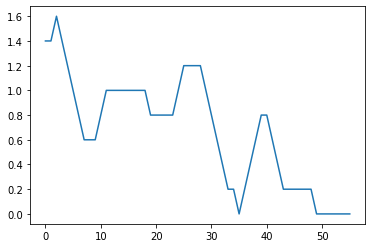

3 fast cars


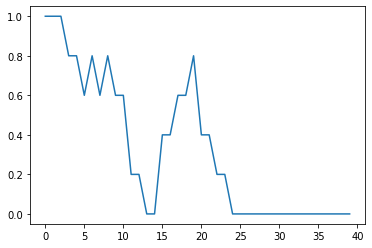

5 phases of the moon


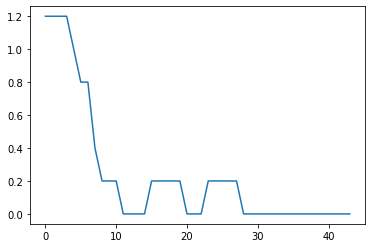

7 prime ministers of england


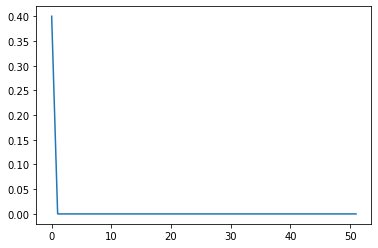

8 ipod models


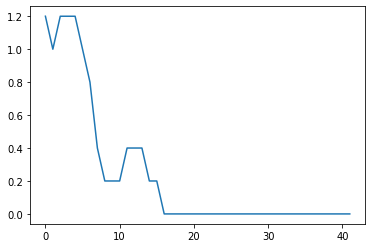

9 bittorrent clients


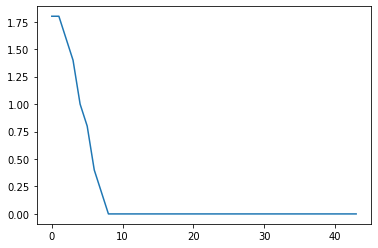

10 olympus digital slrs


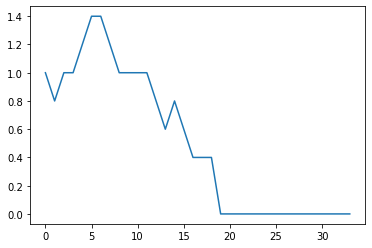

11 composition of the sun


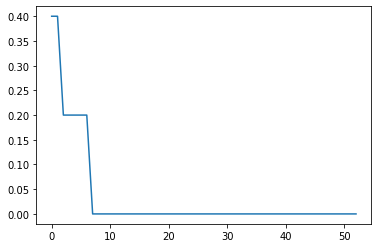

13 fuel consumption


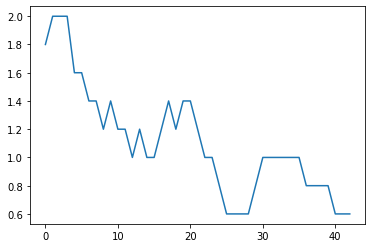

16 nutrition values


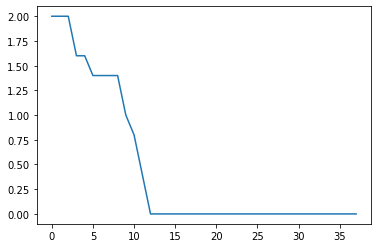

17 state capitals and largest cities in us


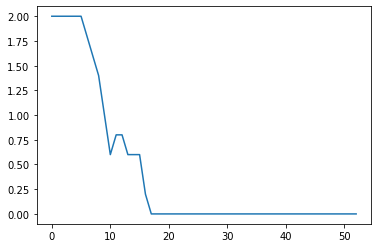

18 professional wrestlers


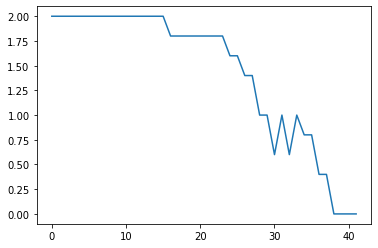

19 company income statements


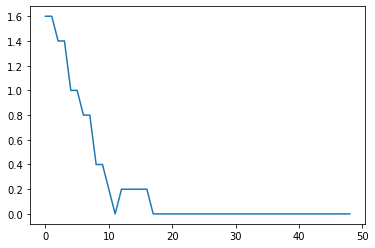

20 dog breeds


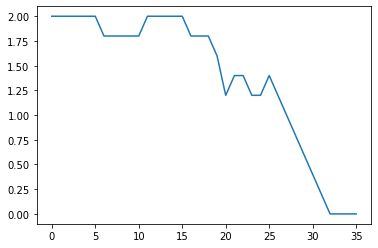

21 ibanez guitars


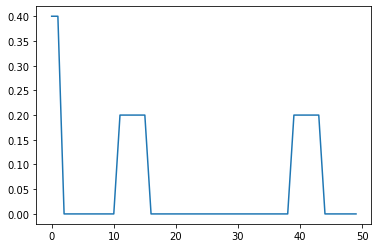

22 used cellphones


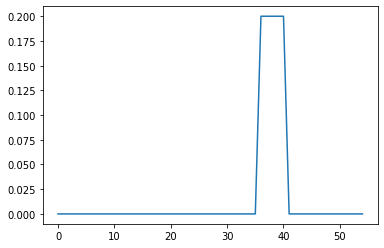

23 world religions


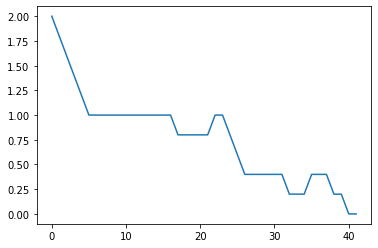

24 stocks


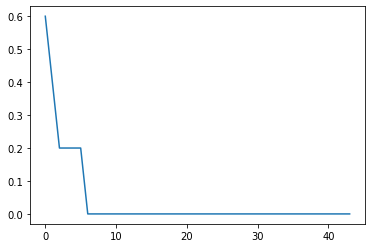

25 academy awards


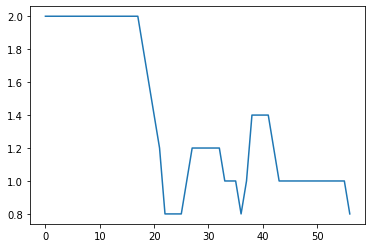

26 2008 olympic gold medal winners


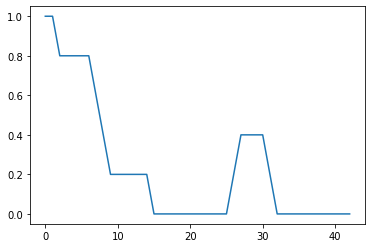

27 currencies of different countries


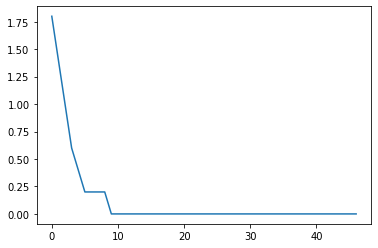

28 science discoveries


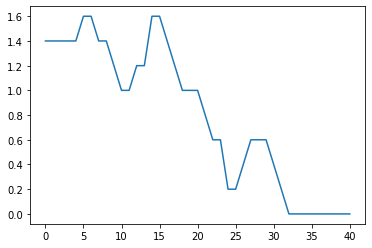

30 pain medications


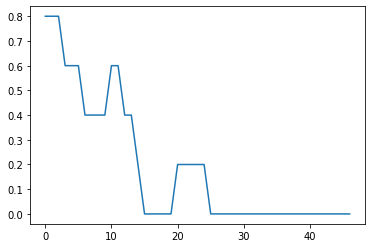

31 football clubs city


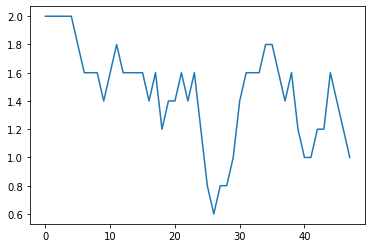

34 diseases mortality


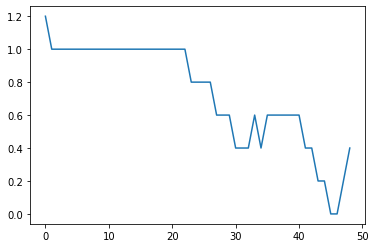

35 cigarette brands market share


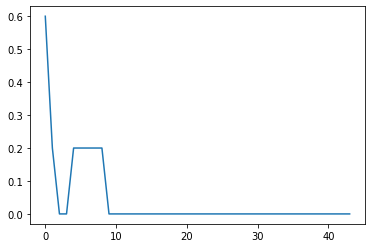

37 healthy food nutritional value


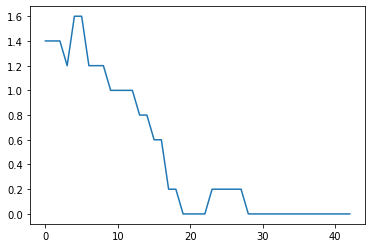

38 hormones effects


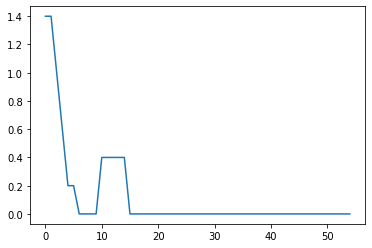

39 household chemicals strength


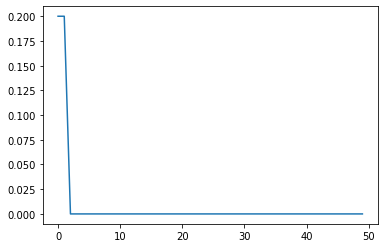

40 lakes altitude


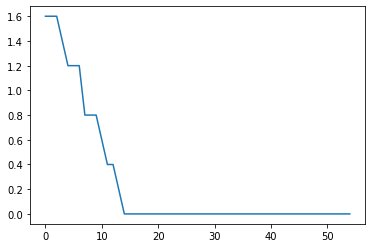

41 laptops cpu


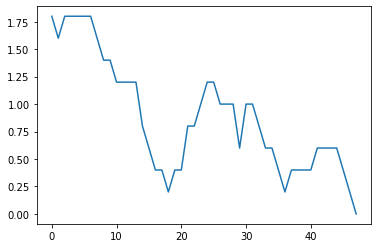

42 asian countries currency


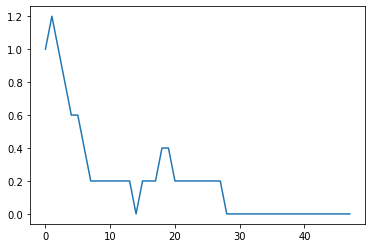

43 diseases risks


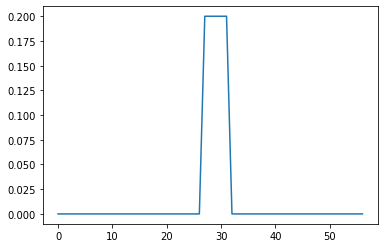

44 external drives capacity


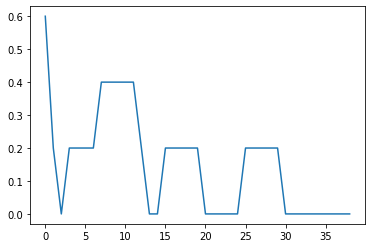

45 baseball teams captain


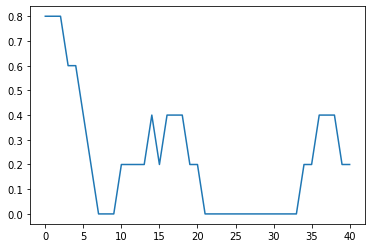

46 maryland counties population


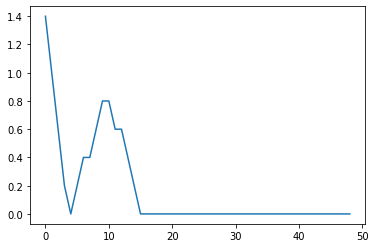

48 diseases incidence


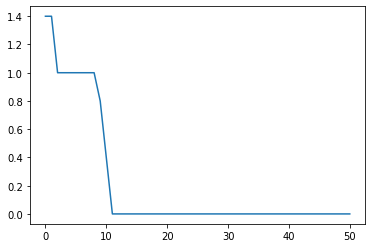

50 irish counties area


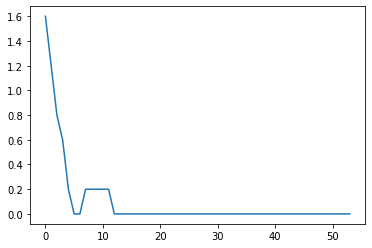

51 cereals nutritional value


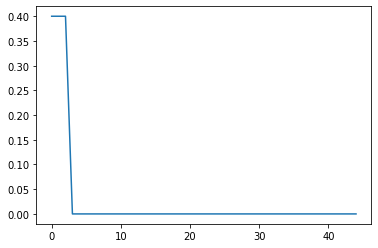

54 broadway musicals director


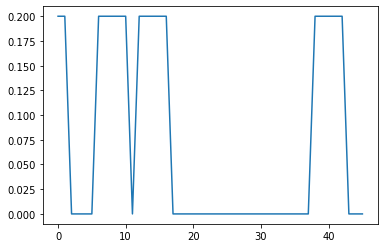

55 infections treatment


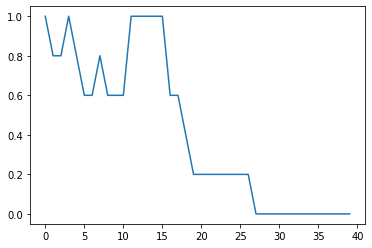

56 food type


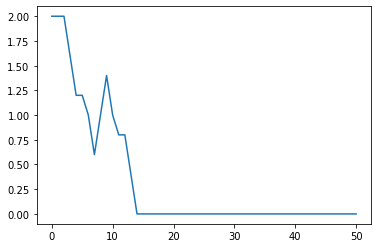

57 board games number of players


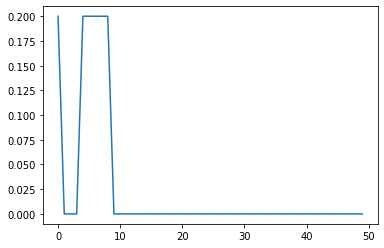

58 google products reviews


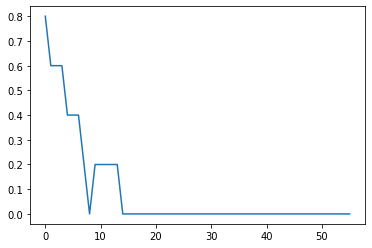

60 games age


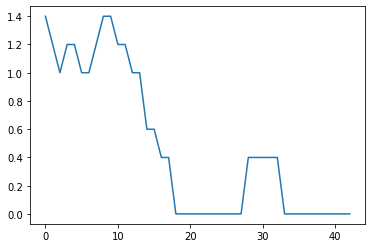

In [ ]:
# plot moving average of the true labels of the ranked list
# a desired plot should be monotonically decreasing
# aim to check if certain query perform poorly
for qid in exist_queries:
  print(qid, queries[qid])
  label_list = np.array(qrel[qrel['query_id'] == qid].true_label)
  k = 5
  ma_list = []
  i_list = []
  for i in range(len(label_list) - k):
    i_list.append(i)
    ma_list.append(label_list[i:i+k].mean())
  plt.plot(i_list, ma_list)
  plt.show()

In [253]:
# For each query, say there are n labeled 2 tables
# Top k means the percatage of these n labels are ranked in top k * n 

top1_index = []
test_result = {}
for qid in exist_queries:
  query_df = qrel[qrel['query_id'] == qid]
  label_list = np.array(qrel[qrel['query_id'] == qid].true_label)
  total_2 = sum(query_df.true_label == 2)
  top1_index += list(query_df.index[:total_2])
  if total_2 == 0:
    continue
  else:
    print(qid, queries[qid])
    top1_2 = 100* sum(label_list[:total_2] == 2)/total_2
    top2_2 = 100* sum(label_list[:total_2*2] == 2)/total_2
    top5_2 = 100* sum(label_list[:total_2*5] == 2)/total_2
    print("Total: ", total_2 ,"Top1: ", "{:.2f}%".format(top1_2) ,"Top2:", "{:.2f}%".format(top2_2) ,"Top5: ", "{:.2f}%".format(top5_2))
    test_result[qid] = (total_2, top1_2, top2_2, top5_2)

2 2008 beijing olympics
Total:  4 Top1:  50.00% Top2: 75.00% Top5:  75.00%
3 fast cars
Total:  2 Top1:  0.00% Top2: 0.00% Top5:  0.00%
5 phases of the moon
Total:  2 Top1:  50.00% Top2: 50.00% Top5:  100.00%
7 prime ministers of england
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00%
8 ipod models
Total:  2 Top1:  50.00% Top2: 50.00% Top5:  100.00%
9 bittorrent clients
Total:  5 Top1:  80.00% Top2: 100.00% Top5:  100.00%
10 olympus digital slrs
Total:  5 Top1:  40.00% Top2: 80.00% Top5:  100.00%
11 composition of the sun
Total:  1 Top1:  0.00% Top2: 100.00% Top5:  100.00%
13 fuel consumption
Total:  12 Top1:  75.00% Top2: 100.00% Top5:  100.00%
16 nutrition values
Total:  10 Top1:  80.00% Top2: 100.00% Top5:  100.00%
17 state capitals and largest cities in us
Total:  11 Top1:  90.91% Top2: 100.00% Top5:  100.00%
18 professional wrestlers
Total:  30 Top1:  90.00% Top2: 100.00% Top5:  100.00%
19 company income statements
Total:  5 Top1:  60.00% Top2: 100.00% Top5:  100.00%
20 dog b

In [ ]:
for k,v in sorted(test_result.items(), key=lambda item: item[1][2]):
  print(k, queries[k], v)

3 fast cars (2, 0.0, 0.0, 0.0)
51 cereals nutritional value (1, 0.0, 0.0, 100.0)
55 infections treatment (3, 0.0, 33.333333333333336, 66.66666666666667)
5 phases of the moon (2, 50.0, 50.0, 100.0)
8 ipod models (2, 50.0, 50.0, 100.0)
2 2008 beijing olympics (4, 50.0, 75.0, 75.0)
38 hormones effects (4, 75.0, 75.0, 100.0)
41 laptops cpu (12, 66.66666666666667, 75.0, 100.0)
60 games age (8, 37.5, 75.0, 100.0)
10 olympus digital slrs (5, 40.0, 80.0, 100.0)
37 healthy food nutritional value (8, 62.5, 87.5, 100.0)
28 science discoveries (10, 50.0, 90.0, 100.0)
7 prime ministers of england (1, 100.0, 100.0, 100.0)
9 bittorrent clients (5, 80.0, 100.0, 100.0)
11 composition of the sun (1, 0.0, 100.0, 100.0)
13 fuel consumption (12, 75.0, 100.0, 100.0)
16 nutrition values (10, 80.0, 100.0, 100.0)
17 state capitals and largest cities in us (11, 90.9090909090909, 100.0, 100.0)
18 professional wrestlers (30, 90.0, 100.0, 100.0)
19 company income statements (5, 60.0, 100.0, 100.0)
20 dog breeds (2

In [ ]:
#test if table size matter

def get_table_size(table_id):
  data = tables[table_id]['data']
  if len(data) == 0:
    return 0
  return len(data) * len(data[0])

qrel['table_size'] = qrel.table_id.apply(get_table_size)

In [ ]:
qrel['table_size'].corr(qrel['prediction'])

0.06971397155553104

In [ ]:
top_rank_df = qrel.iloc[top1_index].copy()

In [ ]:
top_rank_df.shape

(257, 5)

In [ ]:
top_rank_df.table_size.mean()

116.23735408560312

In [ ]:
top_rank_df.table_size.std()

341.1660526403849

In [ ]:
top_rank_df[top_rank_df.true_label == 2].table_size.mean()

127.08510638297872

In [ ]:
top_rank_df[top_rank_df.true_label != 2].table_size.mean()

86.68115942028986

In [262]:
label_list = []
percentage_list = []
step = len(top_rank_df.table_size)//10
for i in range(0, len(top_rank_df.table_size) - step, step):
  temp_df = top_rank_df[top_rank_df.table_size.between(sorted(top_rank_df.table_size)[i], sorted(top_rank_df.table_size)[i+step], inclusive=True)].copy()
  percentage_list.append(len(temp_df[temp_df.true_label == 2])/len(temp_df))
  label_list.append("[" + str(sorted(top_rank_df.table_size)[i]) + "," + str(sorted(top_rank_df.table_size)[i+step]) + "]")


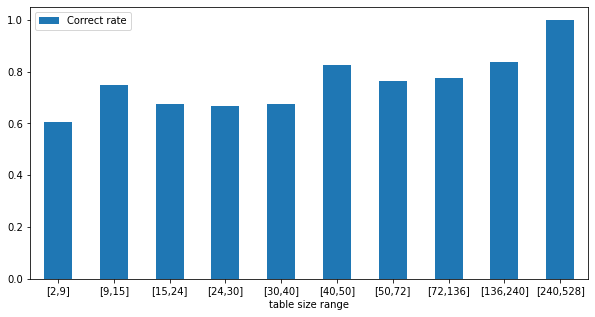

In [264]:
 pd.DataFrame({'table size range':label_list, 'Correct rate':percentage_list}).plot.bar(x='table size range', y='Correct rate', rot=0, figsize=(10, 5))

In [ ]:
qrel.table_size.describe()

count    2339.000000
mean       71.096622
std       176.827196
min         0.000000
25%        12.000000
50%        30.000000
75%        66.000000
max      4860.000000
Name: table_size, dtype: float64

In [ ]:
qrel[qrel['table_size'] < 12].prediction.mean()

0.1769500890161514

In [ ]:
qrel[qrel['table_size'] > 66].prediction.mean()

0.3272215555695152

In [278]:
small_tables = qrel[qrel['table_size'] < 12].copy()
large_tables = qrel[qrel['table_size'] > 66].copy()

In [280]:
sum((small_tables.prediction > qrel[qrel.true_label == 2].prediction.mean()) & (small_tables.true_label == 2))/sum(small_tables.prediction > qrel[qrel.true_label == 2].prediction.mean())

0.6428571428571429

In [281]:
sum((large_tables.prediction > qrel[qrel.true_label == 2].prediction.mean()) & (large_tables.true_label == 2))/sum(large_tables.prediction > qrel[qrel.true_label == 2].prediction.mean())

0.7671232876712328

In [251]:
queries[55]

'infections treatment'

In [ ]:
pd.set_option('display.max_rows', 70)
qrel[qrel['query_id'] == 3]

,query_id,table_id,true_label,prediction
868,3,table-0005-921,1,1.350577
869,3,table-0005-925,1,1.348216
870,3,table-0005-926,1,1.331284
871,3,table-0005-922,1,1.307944
872,3,table-0005-924,1,1.305246
873,3,table-0005-923,1,1.298694
874,3,table-0005-927,1,1.178200
875,3,table-0100-834,0,0.773467
876,3,table-0990-862,1,0.652950
877,3,table-0564-300,0,0.627473


In [ ]:
tables["table-0905-212"]

{'caption': 'Choice of antimicrobials',
 'data': [['• Quinolones, 2nd or 3rd generation – Ciprofloxacin (2nd) or Levofloxacin (3rd)'],
  ['• Cephalosporins, 3rd or 4th generation – Ceftriaxone (3rd) or Cefepime (4th)'],
  ['• Aminoglycosides – Gentamicin or Amikacin'],
  ['• ± Amoxicillin or Vancomycin'],
  ['• ± Amphotericin B (persistent fever 7 days on Rx)']],
 'numCols': 1,
 'numDataRows': 5,
 'numHeaderRows': 1,
 'numericColumns': [],
 'pgTitle': 'Treatment of infections after exposure to ionizing radiation',
 'secondTitle': 'Choice of antimicrobials',
 'table_array': [['Antimicrobial Therapy for Sepsis after Irradiation (Duration 21–28 days)'],
  ['• Quinolones, 2nd or 3rd generation – Ciprofloxacin (2nd) or Levofloxacin (3rd)'],
  ['• Cephalosporins, 3rd or 4th generation – Ceftriaxone (3rd) or Cefepime (4th)'],
  ['• Aminoglycosides – Gentamicin or Amikacin'],
  ['• ± Amoxicillin or Vancomycin'],
  ['• ± Amphotericin B (persistent fever 7 days on Rx)']],
 'title': ['Antimicrobi

In [ ]:
queries[3]

'fast cars'

In [ ]:
pd.set_option('display.max_rows', 70)
qrel[qrel['query_id'] == 3]

,query_id,table_id,true_label,prediction,table_size
868,3,table-0005-921,1,1.350577,21
869,3,table-0005-925,1,1.348216,28
870,3,table-0005-926,1,1.331284,28
871,3,table-0005-922,1,1.307944,21
872,3,table-0005-924,1,1.305246,21
873,3,table-0005-923,1,1.298694,21
874,3,table-0005-927,1,1.178200,35
875,3,table-0100-834,0,0.773467,2
876,3,table-0990-862,1,0.652950,14
877,3,table-0564-300,0,0.627473,24


In [ ]:
tables['table-0005-921']

{'caption': 'Episode 1',
 'data': [['1',
   '[Laird_Hamilton|Laird Hamilton]',
   '148.60mph',
   '149.09mph',
   '148.27mph',
   '1:48:98',
   'Advanced to next round'],
  ['2',
   '[John_Elway|John Elway]',
   '146.02mph',
   '146.26mph',
   '148.64mph',
   '1:50:23',
   'Advanced to next round'],
  ['3',
   '[Serena_Williams|Serena Williams]',
   '123.65mph',
   '129.16mph',
   '136.05mph',
   '2:05:17',
   'Eliminated']],
 'numCols': 7,
 'numDataRows': 3,
 'numHeaderRows': 1,
 'numericColumns': [0],
 'pgTitle': 'Fast Cars and Superstars: The Gillette Young Guns Celebrity Race',
 'secondTitle': 'Episode 1',
 'table_array': [['',
   'Driver',
   'Lap 1',
   'Lap 2',
   'Lap 3',
   'Total Time',
   'Result'],
  ['1',
   '[Laird_Hamilton|Laird Hamilton]',
   '148.60mph',
   '149.09mph',
   '148.27mph',
   '1:48:98',
   'Advanced to next round'],
  ['2',
   '[John_Elway|John Elway]',
   '146.02mph',
   '146.26mph',
   '148.64mph',
   '1:50:23',
   'Advanced to next round'],
  ['3',
   '